# General pipeline to solve any problem with Machine Learning/Deep Learning approach

![image](https://drive.google.com/uc?id=1DBnjZWkLQXhJMC-9zZfxM01nVEG6aSOc)



In [200]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from gensim.parsing.preprocessing import remove_stopwords
from google.colab import drive

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [201]:
#google colab drive mount code

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [202]:
# reading data file
df = pd.read_csv('/content/gdrive/MyDrive/Data/Updatedoutput.csv')


In [203]:
df.head()

,"Sudeep, did she invite him though? No right? Why are you getting worded up? You're okay with Parvesh Verma cause he speaks against Muslims but against an idiot like Imam because he called for chakka jam?",1
0,@discerningmumin Islam has never been a resist...,1
1,"Boy, your comment about Journalists wanting to...",1
2,@ShashiTharoor @INCIndia Hindus were and are g...,1
3,White supremicists? How many do you know? Ther...,1
4,Urban naxal and a jihadi TT gang put together....,1


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47997 entries, 0 to 47996
Data columns (total 2 columns):
 #   Column                                                                                                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                       --------------  ----- 
 0   Sudeep, did she invite him though? No right? Why are you getting worded up? You're okay with Parvesh Verma cause he speaks against Muslims but against an idiot like Imam because he called for chakka jam?  47997 non-null  object
 1   1                                                                                                                                                                                           

In [205]:
df.columns = ["text","label"]

In [206]:
df.head()

,text,label
0,@discerningmumin Islam has never been a resist...,1
1,"Boy, your comment about Journalists wanting to...",1
2,@ShashiTharoor @INCIndia Hindus were and are g...,1
3,White supremicists? How many do you know? Ther...,1
4,Urban naxal and a jihadi TT gang put together....,1


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47997 entries, 0 to 47996
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    47997 non-null  object
 1   label   47997 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 750.1+ KB


# Preprocessing and Feature Extraction Phase

In [208]:
df['text']

0        @discerningmumin Islam has never been a resist...
1        Boy, your comment about Journalists wanting to...
2        @ShashiTharoor @INCIndia Hindus were and are g...
3        White supremicists? How many do you know? Ther...
4        Urban naxal and a jihadi TT gang put together....
                               ...                        
47992                 @kufr666 @blockbot no, that's @oolon
47993    @AriMelber why are you giving these idiots air...
47994    I am right now watching Enforcers defend Chums...
47995    ✨✨✨ misandry is not a word iOS can autocomplet...
47996    @Bazmati2020 @sofs_mom I think poor @Annjj is ...
Name: text, Length: 47997, dtype: object

In [209]:
df.dropna(subset = ["text"], inplace=True)


In [210]:
# Removing stopwords

from gensim.parsing.preprocessing import remove_stopwords
def stopword_removal(row):
    text = row['text']
    text = remove_stopwords(text)
    return text

In [211]:
df['text'] = df.apply(stopword_removal, axis=1)


In [212]:
# Converting text into smaller letters.

df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

<ipython-input-212-b3aba37379ec>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


In [213]:
# prepare text samples and their labels

texts = df['text']
labels = df['label']

print('Found %s texts.' %texts.shape[0])

Found 47997 texts.


In [214]:
texts = texts.fillna("")

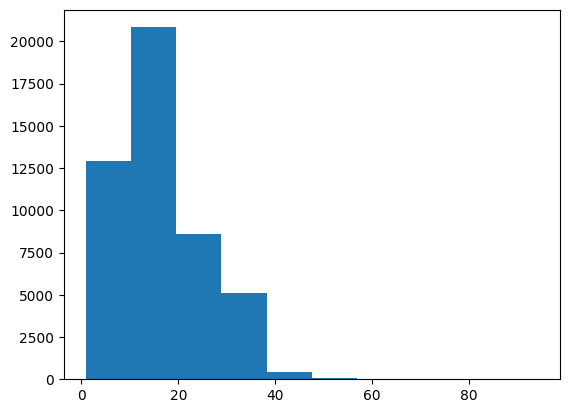

In [215]:
# plot the distribution of article lengths in terms of word counts

text_lengths = texts.apply(lambda x: len(x.split(" ")))
plt.hist(text_lengths)
plt.show()

In [216]:
# Data Augmentation: Synonym Replacement
def synonym_replacement(text, n):
    words = word_tokenize(text)
    new_words = words.copy()
    random_word_list = list(set(words))
    np.random.shuffle(random_word_list)
    num_replaced = 0
    augmented_samples = []
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = np.random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    augmented_text = ' '.join(new_words)
    augmented_samples.append({'text': augmented_text})
    return augmented_samples

def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

df_augmented = pd.DataFrame(columns=['text'])
num_augmented = 2  # Number of augmented samples to generate per original sample

for _, row in df.iterrows():
    original_text = row['text']
    augmented_samples = synonym_replacement(original_text, num_augmented)
    df_augmented = pd.concat([df_augmented, pd.DataFrame(augmented_samples)], ignore_index=True)



In [217]:
MAX_SEQUENCE_LENGTH = 700
MAX_NUM_WORDS = 900
EMBEDDING_DIM = 350
TEST_SPLIT = 0.2

In [218]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [219]:
# vectorize the text samples into a 2D integer tensor 

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences


# tokenizing sentences into words 
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
# using fit_on_texts method assigning values to particular words
tokenizer.fit_on_texts(texts)
# texts_to_sequences method is used to give particular integer values to word
sequences = tokenizer.texts_to_sequences(texts)

# calculating word_index
word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
# padding data to the same length for each samples
data = pad_sequences(sequences, 
                     maxlen=MAX_SEQUENCE_LENGTH, 
                     padding='pre', 
                     truncating='pre')

print('Found %s unique tokens.' % len(word_index))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 59963 unique tokens.
Shape of data tensor: (47997, 700)
Shape of label tensor: (47997,)


# Data Curation Phase

In [220]:
# split the data into a training set and a validation set   

from sklearn.model_selection import train_test_split



x, x_test, y, y_test = train_test_split(data, 
                                       labels, 
                                        test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y, 
                                                  test_size=0.1)



In [221]:
x_train.shape

(34557, 700)

In [222]:
x_val.shape

(3840, 700)

In [223]:
x_test.shape

(9600, 700)

# Model Building Phase

In [224]:
#""" building convolutional neural network model                                                                      

from keras import layers
from keras.models import Sequential
from keras.layers import BatchNormalization, GlobalAveragePooling1D

dropout1 = 0.4
dropout2 = 0.5
dropout3 = 0.6

num_classes = 6
model = Sequential(
    [
        # part 1: word and sequence processing
     
        # defining embedding layer where embedding dimension/ vector size is defined as 64 and input length is set as 700. Where num_words are unique words.
        layers.Embedding(242766,
                         EMBEDDING_DIM, 
                         input_length=MAX_SEQUENCE_LENGTH,
                         trainable=False),
     
        # for defining convolutional layer, number of filters are set as 32 and kernal size is defined as 1 X 5.
        layers.Conv1D(32,5, activation='ReLU'),
        # maxpooling1d layer is used to take maximum values from representation.
        layers.MaxPooling1D(2),
        # adding dropout 0.4
        layers.Dropout(dropout1),
     
        # creating second convolutional layer with kernal size 1 X 3, and number of filters will be 16. Where activation function will remain same as ReLU.
        layers.Conv1D(16,3, activation='ReLU'),
        # creating maxpooling layer with 2 neurons so that will compare with neighbour neuron and will take max value.
        layers.MaxPooling1D(2, strides= 1),
     
        # adding one more convolutional layer with kernal size 1 X 3, and number of filters will be 8 and setting strides value as 2. Where activation function will be ReLU.
        layers.Conv1D(8,3, activation='ReLU',strides= 1),
        # adding flatten layer
        layers.Flatten(),
     
        
        # part 2: classification
      
        # dense layer with 256 neurons and  Relu activation function.
        layers.Dense(256, activation='ReLU'),
        # dropout value is 0.5.
        layers.Dropout(dropout2),
       # layers.Dense(100, activation='ReLU'),
        # dropout value is 0.5.
        #layers.Dropout(dropout3),
     
        # output layer contains 1 values because this is binary classification problem.
        # Where activation function is 'sigmoid' because it will calculate probability of each nuerons individually and whichever nueron has highest value that will be selected. 
        layers.Dense(num_classes, activation='softmax')

        
    ])


# compiling the model with loss as categorical_crossentropy because this is multiclass classfication problem.

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# printing summary of model
model.summary()

model_path = '/content/gdrive/MyDrive/Data/ModelNLP/model.h5'



# Save the model
model.save(model_path)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 700, 350)          84968100  
                                                                 
 conv1d_12 (Conv1D)          (None, 696, 32)           56032     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 348, 32)          0         
 1D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 348, 32)           0         
                                                                 
 conv1d_13 (Conv1D)          (None, 346, 16)           1552      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 345, 16)          0         
 1D)                                                  

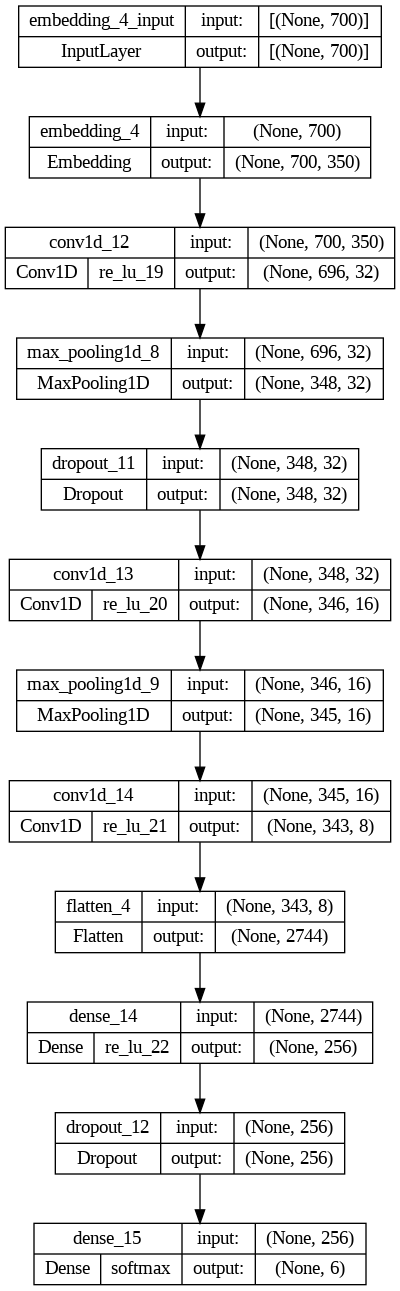

In [225]:
# visalizing the layers of model.
import tensorflow as tf

tf.keras.utils.plot_model(
model,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

# Model Training Phase

In [226]:
from keras.utils import to_categorical

texts = df['text']
labels = df['label']

# Convert labels to numeric format
label_mapping = {label: i for i, label in enumerate(np.unique(labels))}
numeric_labels = np.array([label_mapping[label] for label in labels])

# Convert numeric labels to one-hot encoded format
one_hot_labels = to_categorical(numeric_labels)

x_train_val, x_test, y_train_val, y_test = train_test_split(data, one_hot_labels, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1)


In [227]:
# train the model with batch size of 128 and 15 epochs.
import time as t
start = t.time()
history = model.fit(x_train, 
                    y_train,
                    batch_size=128,
                    epochs=20,
                    validation_data=(x_val, y_val))

print("total training time:",t.time()-start)

Epoch 1/20
270/270 [==============================] - 8s 21ms/step - loss: 1.2656 - accuracy: 0.4584 - val_loss: 0.9290 - val_accuracy: 0.6260
Epoch 2/20
270/270 [==============================] - 6s 21ms/step - loss: 0.7394 - accuracy: 0.6904 - val_loss: 0.5866 - val_accuracy: 0.7380
Epoch 3/20
270/270 [==============================] - 6s 24ms/step - loss: 0.5892 - accuracy: 0.7408 - val_loss: 0.5219 - val_accuracy: 0.7698
Epoch 4/20
270/270 [==============================] - 6s 22ms/step - loss: 0.5324 - accuracy: 0.7630 - val_loss: 0.4923 - val_accuracy: 0.7846
Epoch 5/20
270/270 [==============================] - 5s 19ms/step - loss: 0.5371 - accuracy: 0.7691 - val_loss: 0.4931 - val_accuracy: 0.7758
Epoch 6/20
270/270 [==============================] - 6s 21ms/step - loss: 0.4868 - accuracy: 0.7831 - val_loss: 0.4794 - val_accuracy: 0.7964
Epoch 7/20
270/270 [==============================] - 5s 18ms/step - loss: 0.4787 - accuracy: 0.7912 - val_loss: 0.4768 - val_accuracy: 0.7922

In [228]:
!pip install keras_flops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [229]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2_as_graph

In [230]:
def get_flops(model, batch_size=None):
    if batch_size is None:
        batch_size = 1

    real_model = tf.function(model).get_concrete_function(tf.TensorSpec([batch_size] + model.inputs[0].shape[1:], model.inputs[0].dtype))
    frozen_func, graph_def = convert_variables_to_constants_v2_as_graph(real_model)

    run_meta = tf.compat.v1.RunMetadata()
    opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
    flops = tf.compat.v1.profiler.profile(graph=frozen_func.graph,
                                            run_meta=run_meta, cmd='op', options=opts)
    return flops.total_float_ops

In [231]:
# calculating flops
flops = get_flops(model, batch_size = 128)
print(flops)
print(f"FLOPS: {flops / 10 ** 9:.03} G ")

10336062976
FLOPS: 10.3 G 


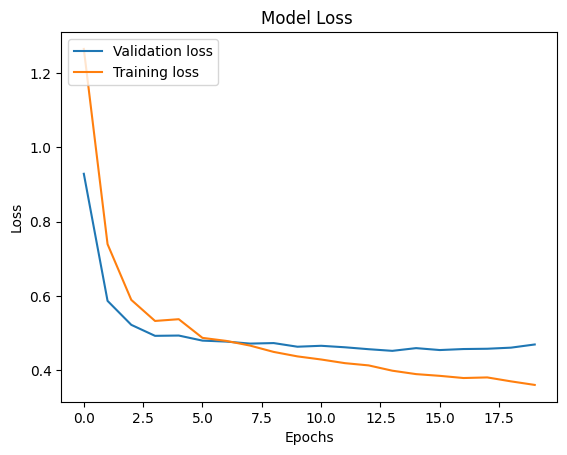

In [232]:
# Plot training & validation accuracy values

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss ')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Validation loss', 'Training loss'], loc='upper left')
plt.show()

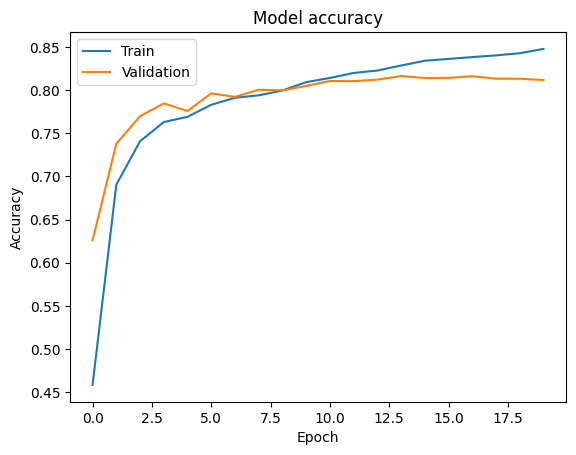

In [233]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Testing phase

In [234]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
300/300 [==============================] - 2s 6ms/step - loss: 0.4590 - accuracy: 0.8151
test loss, test acc: [0.4590367078781128, 0.8151041865348816]


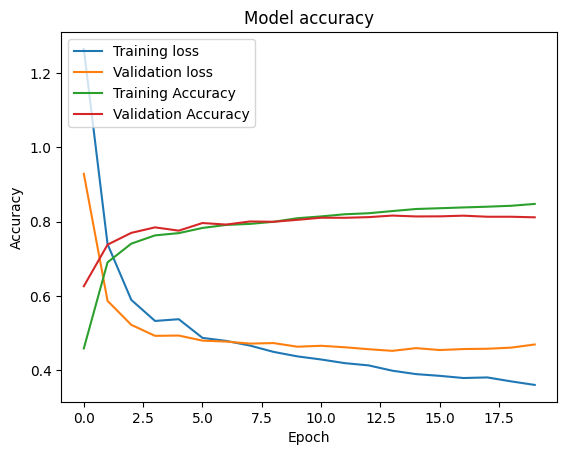

In [235]:
# Plot training & validation accuracy values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss','Training Accuracy','Validation Accuracy'], loc='upper left')
plt.show()

# Evaluation Phase

In [236]:
# define a function that allows us to evaluate models

from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,classification_report,roc_curve



def evaluate_model(predict_fun, X_train, y_train, X_test, y_test):
    '''
    evaluate the model, both training and testing accuraries are reported
    '''
    # training acc
    y_predict_train = predict_fun(X_train)
    train_acc = accuracy_score(y_train,y_predict_train)
    
    # testing acc
    y_predict_test = predict_fun(X_test)
    test_acc = accuracy_score(y_test,y_predict_test)
    

    # accuracy = accuracy_score(y_test,y_pred_tex)
    roc_auc =roc_auc_score(y_test, y_predict_test)
    precision = precision_score(y_pred=y_predict_test, y_true=y_test,zero_division=1)
    recall = recall_score(y_pred=y_predict_test, y_true=y_test,zero_division=1)
    
    cr = classification_report(y_test, y_predict_test,zero_division=1)


    fpr, tpr, threshold = roc_curve(y_test, y_predict_test)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label= 'CNN')
    plt.xlabel('False Positive Rate',fontsize=12)
    plt.ylabel('True Positive Rate',fontsize=12)
    plt.title('%s ROC Curve'% 'CNN',fontsize=20)
    plt.legend(fontsize=12)
    plt.show()

    roc_auc_sc = roc_auc_score(y_test,y_predict_test)

    return train_acc, test_acc,cr,roc_auc_sc

In [237]:
'''# evaluate model
import time as t
start = t.time()
train_acc, test_acc,cr,roc_auc_sc = evaluate_model(lambda x: np.rint(model.predict(x)),
                                     x_train, 
                                     y_train, 
                                     x_test, 
                                     y_test)
print("Training Accuracy: {:.2f}%".format(train_acc*100))
print("Testing Accuracy: {:.2f}%".format(test_acc*100))
print("Classification Report:\n",cr)
print("AUC score",roc_auc_sc)
print("Total time required for testing",t.time()-start)'''

'# evaluate model\nimport time as t\nstart = t.time()\ntrain_acc, test_acc,cr,roc_auc_sc = evaluate_model(lambda x: np.rint(model.predict(x)),\n                                     x_train, \n                                     y_train, \n                                     x_test, \n                                     y_test)\nprint("Training Accuracy: {:.2f}%".format(train_acc*100))\nprint("Testing Accuracy: {:.2f}%".format(test_acc*100))\nprint("Classification Report:\n",cr)\nprint("AUC score",roc_auc_sc)\nprint("Total time required for testing",t.time()-start)'

In [238]:
import time
from sklearn.metrics import classification_report, roc_auc_score

def evaluate_model(predict_func, x_train, y_train, x_test, y_test):
    train_predictions = predict_func(x_train)
    test_predictions = predict_func(x_test)

    train_acc = np.mean(np.argmax(train_predictions, axis=1) == np.argmax(y_train, axis=1))
    test_acc = np.mean(np.argmax(test_predictions, axis=1) == np.argmax(y_test, axis=1))

    cr = classification_report(np.argmax(y_test, axis=1), np.argmax(test_predictions, axis=1))
    roc_auc_sc = roc_auc_score(y_test, test_predictions, multi_class='ovr')

    return train_acc, test_acc, cr, roc_auc_sc

start = time.time()
train_acc, test_acc, cr, roc_auc_sc = evaluate_model(
    lambda x: model.predict(x),
    x_train,
    y_train,
    x_test,
    y_test
)

print("Training Accuracy: {:.2f}%".format(train_acc * 100))
print("Testing Accuracy: {:.2f}%".format(test_acc * 100))
print("Classification Report:\n", cr)
print("AUC score:", roc_auc_sc)
print("Total time required for testing:", time.time() - start)


300/300 [==============================] - 1s 5ms/step
Training Accuracy: 87.74%
Testing Accuracy: 81.51%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1601
           1       0.89      0.83      0.86      1646
           2       0.94      0.98      0.96      1595
           3       0.96      0.98      0.97      1612
           4       0.59      0.38      0.46      1550
           5       0.55      0.76      0.64      1596

    accuracy                           0.82      9600
   macro avg       0.82      0.81      0.81      9600
weighted avg       0.82      0.82      0.81      9600

AUC score: 0.9627005706312413
Total time required for testing: 7.18584132194519


In [239]:
model_path = '/content/gdrive/MyDrive/Data/ModelNLP/model.h5'



# Save the model
model.save(model_path)

# Extended experiment using weights transfer

In [240]:
from tensorflow import keras

# Provide the file path of the saved model
model_path = '/content/gdrive/MyDrive/Data/ModelNLP/model.h5'

# Load the model
loaded_model = keras.models.load_model(model_path)

In [241]:
loaded_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 700, 350)          84968100  
                                                                 
 conv1d_12 (Conv1D)          (None, 696, 32)           56032     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 348, 32)          0         
 1D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 348, 32)           0         
                                                                 
 conv1d_13 (Conv1D)          (None, 346, 16)           1552      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 345, 16)          0         
 1D)                                                  

Mounted at /content/gdrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      72134 non-null  int64 
 1   title   71576 non-null  object
 2   text    72095 non-null  object
 3   label   72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


<ipython-input-242-4f1d72739363>:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


Found 72095 texts.


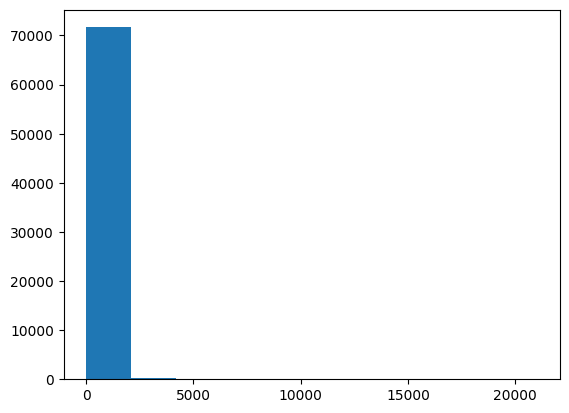

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found 242766 unique tokens.
Shape of data tensor: (72095, 700)
Shape of label tensor: (72095,)


(14419, 700)

In [242]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#google colab drive mount code

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# reading data file
df = pd.read_csv('/content/gdrive/MyDrive/Data/WELFake_Dataset.csv')


df.head()

df.info()

df.columns = ["id","title","text","label"]

df.head()

df.info()

# Preprocessing and Feature Extraction Phase

# read in our data and preprocess it

df.drop(labels=['id','title'], axis='columns', inplace=True)


df['text']

df.dropna(subset = ["text"], inplace=True)


# Removing stopwords

from gensim.parsing.preprocessing import remove_stopwords
def stopword_removal(row):
    text = row['text']
    text = remove_stopwords(text)
    return text

df['text'] = df.apply(stopword_removal, axis=1)


# Converting text into smaller letters.

df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

# prepare text samples and their labels

texts = df['text']
labels = df['label']

print('Found %s texts.' %texts.shape[0])

texts = texts.fillna("")

# plot the distribution of article lengths in terms of word counts

text_lengths = texts.apply(lambda x: len(x.split(" ")))
plt.hist(text_lengths)
plt.show()

MAX_SEQUENCE_LENGTH = 700
MAX_NUM_WORDS = 1000
EMBEDDING_DIM = 350
TEST_SPLIT = 0.2

!pip install keras_preprocessing

# vectorize the text samples into a 2D integer tensor 

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences


# tokenizing sentences into words 
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
# using fit_on_texts method assigning values to particular words
tokenizer.fit_on_texts(texts)
# texts_to_sequences method is used to give particular integer values to word
sequences = tokenizer.texts_to_sequences(texts)

# calculating word_index
word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
# padding data to the same length for each samples
data = pad_sequences(sequences, 
                     maxlen=MAX_SEQUENCE_LENGTH, 
                     padding='pre', 
                     truncating='pre')

print('Found %s unique tokens.' % len(word_index))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Data Curation Phase

# split the data into a training set and a validation set   

from sklearn.model_selection import train_test_split



x, x_test, y, y_test = train_test_split(data, 
                                        labels, 
                                        test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y, 
                                                  test_size=0.1)



x_train.shape

x_val.shape

x_test.shape



In [243]:
from keras.layers import Activation, Dense
model_new = Sequential()
# going through until last layer (ommitting last layer as this problem belongs to binary classification)
for layer in loaded_model.layers[:-1]: 
    model_new.add(layer)

# adding final layer with 1 neuron as this is binary classification problem and sigmoid activation function
model_new.add(Dense(1,activation = 'sigmoid'))


# compiling model
model_new.summary()
model_new.compile(optimizer='adam', loss='binary_crossentropy',metrics= ['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 700, 350)          84968100  
                                                                 
 conv1d_12 (Conv1D)          (None, 696, 32)           56032     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 348, 32)          0         
 1D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 348, 32)           0         
                                                                 
 conv1d_13 (Conv1D)          (None, 346, 16)           1552      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 345, 16)          0         
 1D)                                                  

In [244]:
# train the model
import time as t
start = t.time()

# fitting data to model where batch size is defined as 128 and epochs set as 15. Also validating model with 10% validation values of dataset.
history = model_new.fit(x_train, 
                    y_train,
                    batch_size=128,
                    epochs=15,
                    validation_data=(x_val, y_val))
print("total time in training",t.time()-start)

Epoch 1/15
406/406 [==============================] - 11s 20ms/step - loss: 0.4245 - accuracy: 0.7968 - val_loss: 0.2063 - val_accuracy: 0.9078
Epoch 2/15
406/406 [==============================] - 9s 21ms/step - loss: 0.1896 - accuracy: 0.9220 - val_loss: 0.1532 - val_accuracy: 0.9379
Epoch 3/15
406/406 [==============================] - 9s 23ms/step - loss: 0.1328 - accuracy: 0.9481 - val_loss: 0.1197 - val_accuracy: 0.9539
Epoch 4/15
406/406 [==============================] - 8s 20ms/step - loss: 0.1286 - accuracy: 0.9565 - val_loss: 0.1165 - val_accuracy: 0.9530
Epoch 5/15
406/406 [==============================] - 7s 18ms/step - loss: 0.0917 - accuracy: 0.9655 - val_loss: 0.1074 - val_accuracy: 0.9587
Epoch 6/15
406/406 [==============================] - 6s 15ms/step - loss: 0.0788 - accuracy: 0.9703 - val_loss: 0.1152 - val_accuracy: 0.9565
Epoch 7/15
233/406 [================>.............] - ETA: 2s - loss: 0.0683 - accuracy: 0.9745

KeyboardInterrupt: ignored

In [ ]:
from keras.utils import to_categorical

# Convert labels to one-hot encoded format
num_classes = len(np.unique(labels))
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Print the shape of label tensors
print('Shape of label tensor (y_train):', y_train.shape)
print('Shape of label tensor (y_val):', y_val.shape)
print('Shape of label tensor (y_test):', y_test.shape)


In [ ]:
import time as t
start = t.time()

# Evaluate the model
train_predictions = np.argmax(model_new.predict(x_train), axis=1)
test_predictions = np.argmax(model_new.predict(x_test), axis=1)

# Calculate accuracy
train_acc = accuracy_score(np.argmax(y_train, axis=1), train_predictions)
test_acc = accuracy_score(np.argmax(y_test, axis=1), test_predictions)

# Calculate classification report
cr = classification_report(np.argmax(y_test, axis=1), test_predictions)

# Calculate AUC score
roc_auc_sc = roc_auc_score(y_test, model_new.predict(x_test), multi_class='ovr')

print("Training Accuracy: {:.2f}%".format(train_acc * 100))
print("Testing Accuracy: {:.2f}%".format(test_acc * 100))
print("Classification Report:\n", cr)
print("AUC score:", roc_auc_sc)
print("Total time required for testing:", t.time() - start)


In [ ]:
# evaluate model
import time as t
start = t.time()
train_acc, test_acc,cr,roc_auc_sc = evaluate_model(lambda x: np.rint(model_new.predict(x)),
                                     x_train, 
                                     y_train, 
                                     x_test, 
                                     y_test)
print("Training Accuracy: {:.2f}%".format(train_acc*100))
print("Testing Accuracy: {:.2f}%".format(test_acc*100))
print("Classification Report:\n",cr)
print("AUC score",roc_auc_sc)
print("Total time required for testing",t.time()-start)

In [ ]:
# evaluating model after swapping weights from cyberbullying to fake news.
model_new.evaluate(x_test,y_test)